In [1]:
# Settings and packages
%matplotlib inline

import sys
sys.path.append('../src')

import uschartbook.config

from uschartbook.config import *
from uschartbook.utils import *

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Rectangle
from matplotlib.colors import Normalize
from matplotlib.patches import Polygon

plt.rc('font', family='Lato')

In [2]:
# College data from API and store in database
#api_results = bea_api_gdpstate(bea_key)

#bea_to_db(api_results)

In [2]:
# Retrieve data
d = {}
d[0] = gdpstate_df(retrieve_table('RGDP_SQN')['Data']).iloc[-4:]
d[1] = gdpstate_df(retrieve_table('RGDP_SQN')['Data']).iloc[-8:-4]

for grp in [0, 1]:
    d[grp + 2] = (d[grp].iloc[-1] / d[grp].iloc[0] - 1) * 100
cmap = plt.cm.Spectral
norm = Normalize(vmin=-8, vmax=8)

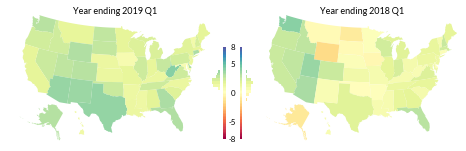

In [4]:
# Map settings
m = Basemap(llcrnrlon=-121, llcrnrlat=20, urcrnrlon=-64, urcrnrlat=49,
            projection='lcc', lat_1=33, lat_2=45, lon_0=-95)
m.readshapefile('shapefiles/states', 'states', drawbounds=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7.0, 2.4))
fig.tight_layout()

# Draw map
for group in [0, 1]:
    plt.sca(axes[group])
    axes[group].axis('off')
    m.drawmapboundary()
    
    for info, shape in zip(m.states_info, m.states):
        
        fc = cmap(norm(d[group + 2][info['STATE_NAME']]))
        if info['STATE_NAME'] == 'Hawaii':
            shape = [(x + 5200000, y - 1400000) for x,y in shape]
        elif info['STATE_NAME'] == 'Alaska':
            shape = [(x*0.35 + 1100000, y*0.35 - 1300000) for x,y in shape]
        axes[group].add_patch(Polygon(shape, fc=fc))
    
    date = f'{d[group].index[-1].year} Q{d[group].index[-1].quarter}'
    plt.text(0.32, 0.99, f'Year ending {date}', fontsize=9, 
             transform=axes[group].transAxes)
    
ax_inset = inset_axes(axes[0], width='-30%', height='70%', loc=4, borderpad=0.5)
for tick_label in [-8, -5, 0, 5, 8]:
    plt.text(0.6, norm(tick_label), tick_label, fontsize=8, 
             ha='center', va='center', transform=ax_inset.transAxes)
ax_inset.axis('off')

for group, pt, pt2 in [(0, 0.71, 0.8), (1, 0.44, 0.39)]:
    for i in np.linspace(-8,8,65):
        rect = Rectangle(xy=(pt, norm(i)), width=0.04, height=1/64, 
                         fc=cmap(norm(i)), ec=None)
        ax_inset.add_patch(rect)    
    
    bins = pd.cut(d[group+2], np.linspace(-8,8,33)).apply(lambda x: x.left)
    res = d[group+2].groupby(bins).count()
    for i, v in res.items():
        if group == 0:
            adj = (v / 100)
        else:
            adj = 0
        if v > 0:
            rect = Rectangle(xy=(pt2 + adj, norm(i)), width= -(v / 100), 
                             height=1/32, fc=cmap(norm(i)), ec=None)
            ax_inset.add_patch(rect)    
    
plt.savefig('../chartbook/data/gdp_map.pgf', bbox_inches='tight')

In [168]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle

In [162]:
f'{d[0].index[-1].year} Q{d[0].index[-1].quarter}'

'2019 Q1'

In [110]:
shape = [(4345346.772429131, 1863385.508337643), (4335711.55834601, 1877692.797813572), (4341147.976142661, 1885699.4980744505), (4354464.015885443, 1876707.8311327724), (4345346.772429131, 1863385.508337643)]

In [66]:
mpat = [(x*1.25, y*1.25) for x,y in shape]

In [38]:
[(x*1.15, y*1.15) for x,y in shape]

[(4997148.7882935, 2142893.3345882893),
 (4986068.292097911, 2159346.7174856076),
 (4992320.1725640595, 2168554.422785618),
 (5007633.61826826, 2158214.005802688),
 (4997148.7882935, 2142893.3345882893)]

In [26]:
m.states_info

[{'STATE_NAME': 'Hawaii',
  'DRAWSEQ': 1,
  'STATE_FIPS': '15',
  'SUB_REGION': 'Pacific',
  'STATE_ABBR': 'HI',
  'RINGNUM': 1,
  'SHAPENUM': 1},
 {'STATE_NAME': 'Hawaii',
  'DRAWSEQ': 1,
  'STATE_FIPS': '15',
  'SUB_REGION': 'Pacific',
  'STATE_ABBR': 'HI',
  'RINGNUM': 2,
  'SHAPENUM': 1},
 {'STATE_NAME': 'Hawaii',
  'DRAWSEQ': 1,
  'STATE_FIPS': '15',
  'SUB_REGION': 'Pacific',
  'STATE_ABBR': 'HI',
  'RINGNUM': 3,
  'SHAPENUM': 1},
 {'STATE_NAME': 'Hawaii',
  'DRAWSEQ': 1,
  'STATE_FIPS': '15',
  'SUB_REGION': 'Pacific',
  'STATE_ABBR': 'HI',
  'RINGNUM': 4,
  'SHAPENUM': 1},
 {'STATE_NAME': 'Hawaii',
  'DRAWSEQ': 1,
  'STATE_FIPS': '15',
  'SUB_REGION': 'Pacific',
  'STATE_ABBR': 'HI',
  'RINGNUM': 5,
  'SHAPENUM': 1},
 {'STATE_NAME': 'Hawaii',
  'DRAWSEQ': 1,
  'STATE_FIPS': '15',
  'SUB_REGION': 'Pacific',
  'STATE_ABBR': 'HI',
  'RINGNUM': 6,
  'SHAPENUM': 1},
 {'STATE_NAME': 'Washington',
  'DRAWSEQ': 2,
  'STATE_FIPS': '53',
  'SUB_REGION': 'Pacific',
  'STATE_ABBR': 'WA',
 

In [239]:
[v for i, v in res.items()]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 6,
 5,
 8,
 17,
 4,
 6,
 4,
 4,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0]

In [248]:
for i, v in res.items():
    if v > 0:
        #print(i)
        print('x: ', 0.8 + (v / 100))
        print('y: ', norm(i))
        print('width: ', v / 100)
        print('height: ', 1/32)

x:  0.81
y:  0.40625
width:  0.01
height:  0.03125
x:  0.81
y:  0.4375
width:  0.01
height:  0.03125
x:  0.81
y:  0.46875
width:  0.01
height:  0.03125
x:  0.8600000000000001
y:  0.5
width:  0.06
height:  0.03125
x:  0.8500000000000001
y:  0.53125
width:  0.05
height:  0.03125
x:  0.88
y:  0.5625
width:  0.08
height:  0.03125
x:  0.9700000000000001
y:  0.59375
width:  0.17
height:  0.03125
x:  0.8400000000000001
y:  0.625
width:  0.04
height:  0.03125
x:  0.8600000000000001
y:  0.65625
width:  0.06
height:  0.03125
x:  0.8400000000000001
y:  0.6875
width:  0.04
height:  0.03125
x:  0.8400000000000001
y:  0.71875
width:  0.04
height:  0.03125
x:  0.8200000000000001
y:  0.75
width:  0.02
height:  0.03125
x:  0.81
y:  0.8125
width:  0.01
height:  0.03125


In [ ]:
height = 1/32
width = res[]
x = 0.8
y = 

In [241]:
res[-8]

0

In [220]:
bins = pd.cut(d[0].mean(), np.linspace(-8,8,33)).apply(lambda x: x.left)
d[1].mean().groupby(bins).count()

-8.0     0
-7.5     0
-7.0     0
-6.5     0
-6.0     0
-5.5     0
-5.0     0
-4.5     0
-4.0     0
-3.5     0
-3.0     0
-2.5     0
-2.0     0
-1.5     0
-1.0     0
-0.5     0
 0.0     1
 0.5     0
 1.0     2
 1.5     7
 2.0    13
 2.5     5
 3.0    17
 3.5     7
 4.0     2
 4.5     4
 5.0     1
 5.5     1
 6.0     0
 6.5     0
 7.0     0
 7.5     0
dtype: int64

In [41]:
df['District of Columbia'].mean()

1.8813974377228313

In [196]:
cmap(norm(-5))

(0.942560553633218, 0.4057670126874279, 0.2682814302191465, 1.0)

In [200]:
for i in np.linspace(-8,8,65):
    print(norm(i))
    print(cmap(i))

0.0
(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
0.015625
(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
0.03125
(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
0.046875
(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
0.0625
(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
0.078125
(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
0.09375
(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
0.109375
(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
0.125
(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
0.140625
(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
0.15625
(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
0.171875
(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
0.1875
(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
0.203125
(0.61